3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Test MSE: 3.99
R² Score: 0.81


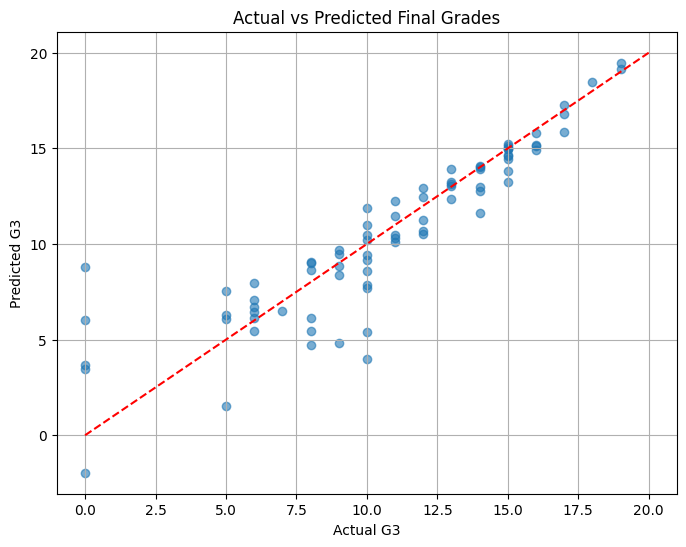

In [7]:
import sys
import os

# Add the src folder to Python's import path
sys.path.append(os.path.abspath("../src"))

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from prepare_data import load_and_prepare_data
from sklearn.metrics import mean_squared_error, r2_score


# Load data
X_train, X_test, y_train, y_test = load_and_prepare_data("../data/student-mat.csv")

# Load saved model
model = tf.keras.models.load_model("../models/student_regression_model.keras")

# Predict
y_pred = model.predict(X_test).flatten()

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades")
plt.plot([0, 20], [0, 20], "--", color="red")
plt.grid(True)
plt.show()

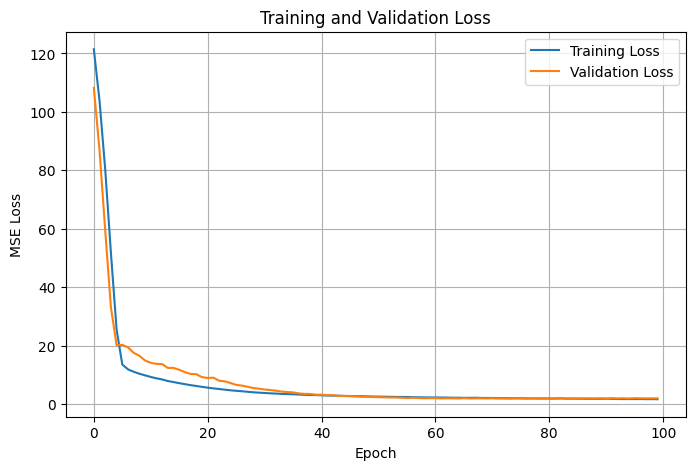

In [8]:
import json

# Load training history
with open("../outputs/history.json", "r") as f:
    history = json.load(f)

# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(history["loss"], label="Training Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

## 📋 Summary

- Model trained on 6 input features to predict student final grade (G3)
- Achieved R² ≈ 0.78 on test data
- Predictions closely follow actual values
- Training loss steadily decreased, showing stable convergence